In [ ]:
import pandas as pd


filtered_df = pd.read_csv('/content/drive/MyDrive/shortlisted.csv')


filtered_df = filtered_df[filtered_df['Date'] > '2024-10-01']


In [ ]:
import requests
census_tracts = []
geoid = []

def get_census_tract(lat, lng):
    url = f"https://geocoding.geo.census.gov/geocoder/geographies/coordinates"
    params = {
        "x": lng,
        "y": lat,
        "benchmark": "Public_AR_Census2020",
        "vintage": "Census2020_Census2020",
        "layers": "Census Tracts",
        "format": "json",
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        try:
            return data["result"]["geographies"]["Census Tracts"][0]['TRACT']
        except (KeyError, IndexError):
            return None
    else:
        return None

for i in range(len(filtered_df)):
    lat = filtered_df.iloc[i]['Latitude']
    lng = filtered_df.iloc[i]['Longitude']
    try:
        result = get_census_tract(lat, lng)
    except Exception:
        result = None

    census_tracts.append(result)
    geoc = "17103" + str(result)
    geoid.append(geoc)

filtered_df['Census-tracts'] = census_tracts
filtered_df['geoid'] = geoid


In [ ]:
geoid = ["17031" + item[5:] for item in geoid]


In [ ]:
filtered_df['geoid'] = geoid


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/pca_vals.csv')


In [ ]:
filtered_df['Census-tracts'] = census_tracts
filtered_df['geoid'] = geoid
filtered_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Census-tracts,geoid
0,13616489,JH451030,2024-10-01 00:00:00,054XX N HARLEM AVE,0610,BURGLARY,FORCIBLE ENTRY,SMALL RETAIL STORE,False,False,...,05,1127365.0,1935728.0,2024,10/08/2024 03:41:23 PM,41.979963,-87.806979,"(41.979962633, -87.806978658)",100600,17031100600
1,13616723,JH451613,2024-10-01 00:00:00,012XX N ASHLAND AVE,0560,ASSAULT,SIMPLE,CTA STATION,False,True,...,08A,1165506.0,1908134.0,2024,10/08/2024 03:41:23 PM,41.903514,-87.667498,"(41.90351448, -87.667498444)",241600,17031241600
2,13620445,JH455939,2024-10-01 00:00:00,005XX E 94TH ST,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,08A,1181372.0,1842759.0,2024,10/08/2024 03:41:23 PM,41.723768,-87.611238,"(41.723767615, -87.611237607)",490200,17031490200
3,13617301,JH452201,2024-10-01 00:00:00,006XX E 89TH PL,0610,BURGLARY,FORCIBLE ENTRY,APARTMENT,False,False,...,05,1182031.0,1845774.0,2024,10/08/2024 03:41:23 PM,41.732026,-87.608731,"(41.732025939, -87.608730784)",440900,17031440900
4,13616455,JH451232,2024-10-01 00:00:00,074XX S EAST END AVE,0560,ASSAULT,SIMPLE,SCHOOL - PUBLIC BUILDING,False,False,...,08A,1188823.0,1856085.0,2024,10/08/2024 03:41:23 PM,41.760161,-87.583520,"(41.760160698, -87.583520062)",430900,17031430900


In [ ]:
grouped = filtered_df.groupby('Census-tracts')
tract_dfs = {tract: data for tract, data in grouped}

  Census-Tract  PCA-Value
0       010100  11.437568
1       010201   9.448538
2       010202  22.864080
3       010300   8.147372
4       010400  12.402411


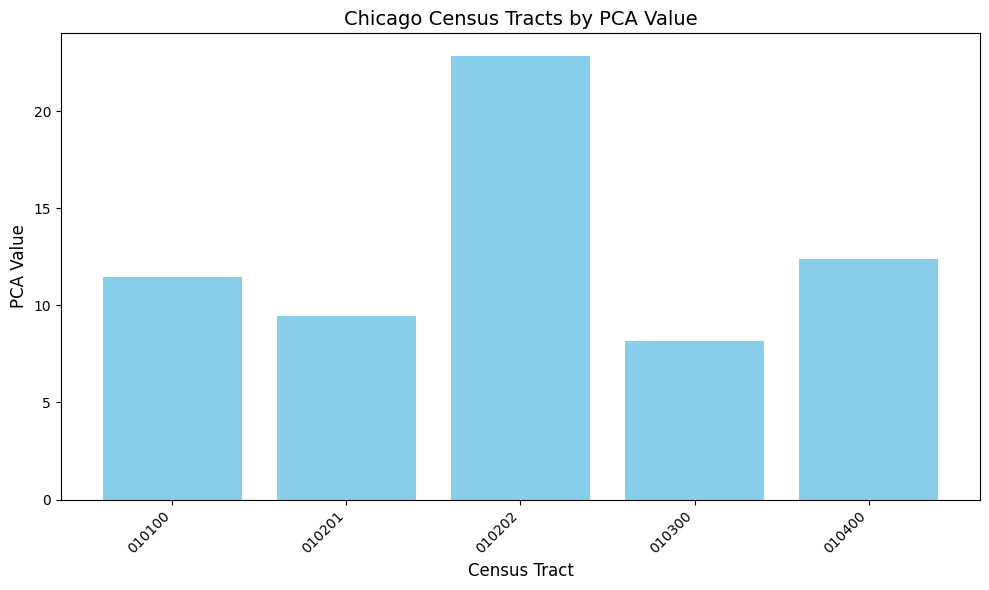

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


census_tracts = list(tract_dfs.keys())
pca_values = list(df['combined_crime_value'])

data = {
    'Census-Tract': census_tracts,
    'PCA-Value': pca_values
}

df_fin = pd.DataFrame(data)

df_fin['Census-Tract'] = df_fin['Census-Tract'].astype(str)

n=5


subset_data = df_fin.head(n)
print(subset_data)

plt.figure(figsize=(10, 6))
plt.bar(subset_data['Census-Tract'], subset_data['PCA-Value'], color='skyblue')
plt.xlabel('Census Tract', fontsize=12)
plt.ylabel('PCA Value', fontsize=12)
plt.title('Chicago Census Tracts by PCA Value', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()